# COvid-19


##### Programme: MSc Spatial Data Science and Visualisation
##### Module: Dissertation
##### Student id: 19035452

## 1. Presentation of Data and Data preprocessing

### 1.1 Import Library

In [1]:
import os
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats, integrate
import seaborn as sns
import os
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sn
import scipy as sp
import statsmodels.api as sm
import scipy.stats as sps
import matplotlib.pyplot as plt

import sklearn
import sklearn.metrics as sklm
import sklearn.cluster as sklc
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler, MinMaxScaler

from sklearn import linear_model
from sklearn.linear_model import lasso_path
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.model_selection import validation_curve

import matplotlib.pyplot as plt
from itertools import cycle
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

# seaborn中文乱码解决方案
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name())

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline


### 1.2 Getting the Data

In [2]:
Cases_MSOA = "https://raw.githubusercontent.com/Audrey-chenxi/CASA_Dissertation_Chenxi-Zhao/main/Data/Cases_MSOA.csv"
df0 = pd.read_csv(Cases_MSOA, low_memory=False,encoding='gb18030')
print(f"Data frame is {df0.shape[0]:,} x {df0.shape[1]}")
Deprivation_indices_LSOA = "https://raw.githubusercontent.com/Audrey-chenxi/CASA_Dissertation_Chenxi-Zhao/main/Data/Indices%20of%20deprivation_LSOA.csv"
df1 = pd.read_csv(Deprivation_indices_LSOA, low_memory=False)
print(f"Data frame is {df1.shape[0]:,} x {df1.shape[1]}")
LSOA_MSOA = "https://raw.githubusercontent.com/Audrey-chenxi/CASA_Dissertation_Chenxi-Zhao/main/Data/LSOA_MSOA.csv"
df2 = pd.read_csv(LSOA_MSOA, low_memory=False)
print(f"Data frame is {df2.shape[0]:,} x {df2.shape[1]}")
Sociodemographics_MSOA = "https://raw.githubusercontent.com/Audrey-chenxi/CASA_Dissertation_Chenxi-Zhao/main/Data/Sociodemographics_MSOA.csv"
df3 = pd.read_csv(Sociodemographics_MSOA, low_memory=False)
print(f"Data frame is {df3.shape[0]:,} x {df3.shape[1]}")
Bame_London_MSOA = "https://raw.githubusercontent.com/Audrey-chenxi/CASA_Dissertation_Chenxi-Zhao/main/Data/bame_London_MSOA.csv"
df4 = pd.read_csv(Bame_London_MSOA, low_memory=False)
print(f"Data frame is {df4.shape[0]:,} x {df4.shape[1]}")
House_price_MSOA = "https://raw.githubusercontent.com/Audrey-chenxi/CASA_Dissertation_Chenxi-Zhao/main/Data/house%20price_MSOA.csv"
df5 = pd.read_csv(House_price_MSOA, low_memory=False)
print(f"Data frame is {df5.shape[0]:,} x {df5.shape[1]}")

Data frame is 984 x 5
Data frame is 32,844 x 11
Data frame is 227,759 x 2
Data frame is 984 x 10
Data frame is 983 x 2
Data frame is 7,201 x 2


In [3]:
df0.head()

,areaCode,areaName,RollingRate1,RollingRate2,RollingRate3
0,E02000001,City of London,133.8000,956.7000,977.2000
1,E02000002,Marks Gate,142.2000,"1,461.0000","2,611.5000"
2,E02000003,Chadwell Heath East,313.1000,"1,458.7000","2,174.7000"
3,E02000004,Eastbrookend,508.5000,"1,271.0000","2,482.5000"
4,E02000005,Becontree Heath,210.9000,"1,207.8000","2,339.0000"


In [4]:
df3.head()

,MSOA Code,areaName,Not United Kingdom (%),Owned: Owned outright (%),Owned: Owned with a mortgage or loan (%),Social rented (%),Private rented (%),Household spaces with no usual residents (%),population_density,population_prop_over65
0,E02000001,City of London,36.6780,24.9000,17.4000,16.5000,35.9000,20.7000,33.5438,0.1689
1,E02000002,Marks Gate,23.8524,22.0000,24.4000,41.8000,9.9000,2.9000,35.7771,0.1304
2,E02000003,Chadwell Heath East,28.3922,26.8000,38.4000,11.6000,21.6000,2.8000,52.1662,0.1171
3,E02000004,Eastbrookend,14.3966,31.0000,41.8000,16.0000,9.8000,1.9000,26.8231,0.1572
4,E02000005,Becontree Heath,24.9591,22.3000,36.0000,24.9000,15.1000,2.7000,87.8114,0.0886


In [5]:
df4.head()

,MSOA11CD,all_bame_prop
0,E02000001,0.2137
1,E02000002,0.3501
2,E02000003,0.4539
3,E02000004,0.1902
4,E02000005,0.3373


In [6]:
df5.head()

,MSOA code,house price
0,E02004297,142995
1,E02004290,140000
2,E02004298,135000
3,E02004299,100000
4,E02004291,112500


In [7]:
df1.head()

,LSOA code (2011),LSOA name (2011),Index of Multiple Deprivation (IMD) Score,Income Score (rate),Employment Score (rate),"Education, Skills and Training Score",Health Deprivation and Disability Score,Crime Score,Living Environment Score,Adult Skills Sub-domain Score,Geographical Barriers Sub-domain Score
0,E01000001,City of London 001A,6.2080,0.0070,0.0100,0.0240,-1.6540,-2.0120,31.8730,0.0320,-0.4300
1,E01000002,City of London 001B,5.1430,0.0340,0.0270,0.0630,-1.1150,-2.3430,23.0840,0.0340,-1.0600
2,E01000003,City of London 001C,19.4020,0.0860,0.0860,5.8040,-0.1020,-1.0320,40.5350,0.1420,-0.6910
3,E01000005,City of London 001E,28.6520,0.2110,0.1360,22.2600,-0.1210,-1.3170,28.9790,0.3210,-1.1670
4,E01000006,Barking and Dagenham 016A,19.8370,0.1170,0.0590,14.7980,-0.3590,-0.1470,26.8880,0.3250,-0.4000


In [8]:
df2.head()

,LSOA11CD,MSOA11CD
0,E01011966,E02002488
1,E01011974,E02002487
2,E01011965,E02002488
3,E01011983,E02002488
4,E01011950,E02002490


### 1.3 Data Join

First, merge all MSOA related data sets (df0, df1, df2) into London MSOA<br>
Second, convert the LSOA data set to MSOA

In [9]:
# Merging four London MSOA files
df1_1 = pd.merge(left=df0, right=df3, how='left', left_on='areaCode', right_on='MSOA Code')
df1_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   areaCode                                      984 non-null    object 
 1   areaName_x                                    983 non-null    object 
 2   RollingRate1                                  973 non-null    float64
 3   RollingRate2                                  984 non-null    float64
 4   RollingRate3                                  984 non-null    float64
 5   MSOA Code                                     983 non-null    object 
 6   areaName_y                                    983 non-null    object 
 7   Not United Kingdom (%)                        983 non-null    float64
 8   Owned: Owned outright (%)                     983 non-null    float64
 9   Owned: Owned with a mortgage or loan (%)      983 non-null    flo

In [10]:
df1_2 = pd.merge(left=df4, right=df5, how='left', left_on='MSOA11CD', right_on='MSOA code')
df1_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSOA11CD       983 non-null    object 
 1   all_bame_prop  983 non-null    float64
 2   MSOA code      983 non-null    object 
 3   house price    983 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 38.4+ KB


In [11]:
df1_3 = pd.merge(left=df1_1, right=df1_2, how='left', left_on='areaCode', right_on='MSOA11CD')
df1_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   areaCode                                      984 non-null    object 
 1   areaName_x                                    983 non-null    object 
 2   RollingRate1                                  973 non-null    float64
 3   RollingRate2                                  984 non-null    float64
 4   RollingRate3                                  984 non-null    float64
 5   MSOA Code                                     983 non-null    object 
 6   areaName_y                                    983 non-null    object 
 7   Not United Kingdom (%)                        983 non-null    float64
 8   Owned: Owned outright (%)                     983 non-null    float64
 9   Owned: Owned with a mortgage or loan (%)      983 non-null    flo

In [12]:
# Combine LSOA related data collection into MSOA level
df2_1 = pd.merge(left=df1, right=df2, how='inner', left_on='LSOA code (2011)', right_on='LSOA11CD')
df2_1.shape

(171372, 13)

In [13]:
df2_1 = df2_1.drop_duplicates()
df2_1.shape

(32844, 13)

In [14]:
df2_1.head()

,LSOA code (2011),LSOA name (2011),Index of Multiple Deprivation (IMD) Score,Income Score (rate),Employment Score (rate),"Education, Skills and Training Score",Health Deprivation and Disability Score,Crime Score,Living Environment Score,Adult Skills Sub-domain Score,Geographical Barriers Sub-domain Score,LSOA11CD,MSOA11CD
0,E01000001,City of London 001A,6.2080,0.0070,0.0100,0.0240,-1.6540,-2.0120,31.8730,0.0320,-0.4300,E01000001,E02000001
6,E01000002,City of London 001B,5.1430,0.0340,0.0270,0.0630,-1.1150,-2.3430,23.0840,0.0340,-1.0600,E01000002,E02000001
12,E01000003,City of London 001C,19.4020,0.0860,0.0860,5.8040,-0.1020,-1.0320,40.5350,0.1420,-0.6910,E01000003,E02000001
19,E01000005,City of London 001E,28.6520,0.2110,0.1360,22.2600,-0.1210,-1.3170,28.9790,0.3210,-1.1670,E01000005,E02000001
23,E01000006,Barking and Dagenham 016A,19.8370,0.1170,0.0590,14.7980,-0.3590,-0.1470,26.8880,0.3250,-0.4000,E01000006,E02000017


In [15]:
df2_2 = pd.merge(left=df1_3, right=df2_1, how='left', left_on='areaCode', right_on='MSOA11CD')
df2_3 = df2_2.groupby(['areaCode'])['Index of Multiple Deprivation (IMD) Score'].agg(['mean']).reset_index().rename(columns={'mean':'IMD',})
df2_4 = df2_2.groupby(['areaCode'])['Income Score (rate)'].agg(['mean']).reset_index().rename(columns={'mean':'Income',})
df2_5 = df2_2.groupby(['areaCode'])['Employment Score (rate)'].agg(['mean']).reset_index().rename(columns={'mean':'Employment',})
df2_6 = df2_2.groupby(['areaCode'])['Education, Skills and Training Score'].agg(['mean']).reset_index().rename(columns={'mean':'Education',})
df2_7 = df2_2.groupby(['areaCode'])['Health Deprivation and Disability Score'].agg(['mean']).reset_index().rename(columns={'mean':'Health',})
df2_8 = df2_2.groupby(['areaCode'])['Crime Score'].agg(['mean']).reset_index().rename(columns={'mean':'Crime',})
df2_9 = df2_2.groupby(['areaCode'])['Living Environment Score'].agg(['mean']).reset_index().rename(columns={'mean':'Living Environment',})
df2_10 = df2_2.groupby(['areaCode'])['Adult Skills Sub-domain Score'].agg(['mean']).reset_index().rename(columns={'mean':'Adult_skill',})
df2_11 = df2_2.groupby(['areaCode'])['Geographical Barriers Sub-domain Score'].agg(['mean']).reset_index().rename(columns={'mean':'Geo',})

df2_12 = pd.merge(left=df2_3, right=df2_4, how='left', on='areaCode')
df2_12 = pd.merge(left=df2_12, right=df2_5, how='left', on='areaCode')
df2_12 = pd.merge(left=df2_12, right=df2_6, how='left', on='areaCode')
df2_12 = pd.merge(left=df2_12, right=df2_7, how='left', on='areaCode')
df2_12 = pd.merge(left=df2_12, right=df2_8, how='left', on='areaCode')
df2_12 = pd.merge(left=df2_12, right=df2_9, how='left', on='areaCode')
df2_12 = pd.merge(left=df2_12, right=df2_10, how='left', on='areaCode')
df2_12 = pd.merge(left=df2_12, right=df2_11, how='left', on='areaCode')
df2_12.head()

,areaCode,IMD,Income,Employment,Education,Health,Crime,Living Environment,Adult_skill,Geo
0,E02000001,14.8050,0.0627,0.0508,5.3635,-0.6705,-1.6608,40.3702,0.1042,-0.5520
1,E02000002,34.5858,0.2133,0.1345,30.4808,0.2555,0.4450,19.8945,0.4017,-0.4652
2,E02000003,24.8808,0.1398,0.0860,17.6110,-0.0200,0.5238,30.1860,0.3418,-0.7042
3,E02000004,23.9542,0.1415,0.1003,23.1502,0.0567,0.1327,20.3988,0.3742,-0.2323
4,E02000005,30.9286,0.1668,0.1106,27.5686,0.1080,0.6244,35.8610,0.4080,-0.9564


In [16]:
df2_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   areaCode            984 non-null    object 
 1   IMD                 983 non-null    float64
 2   Income              983 non-null    float64
 3   Employment          983 non-null    float64
 4   Education           983 non-null    float64
 5   Health              983 non-null    float64
 6   Crime               983 non-null    float64
 7   Living Environment  983 non-null    float64
 8   Adult_skill         983 non-null    float64
 9   Geo                 983 non-null    float64
dtypes: float64(9), object(1)
memory usage: 84.6+ KB


### 1.4 Data Summarise

Get all datasets of London MSOA level

In [17]:
df3_1 = pd.merge(left=df1_3, right=df2_12, how='left', on='areaCode')
df3_1.head()

,areaCode,areaName_x,RollingRate1,RollingRate2,RollingRate3,MSOA Code,areaName_y,Not United Kingdom (%),Owned: Owned outright (%),Owned: Owned with a mortgage or loan (%),...,house price,IMD,Income,Employment,Education,Health,Crime,Living Environment,Adult_skill,Geo
0,E02000001,City of London,133.8000,956.7000,977.2000,E02000001,City of London,36.6780,24.9000,17.4000,...,"919,325.0000",14.8050,0.0627,0.0508,5.3635,-0.6705,-1.6608,40.3702,0.1042,-0.5520
1,E02000002,Marks Gate,142.2000,"1,461.0000","2,611.5000",E02000002,Marks Gate,23.8524,22.0000,24.4000,...,"350,000.0000",34.5858,0.2133,0.1345,30.4808,0.2555,0.4450,19.8945,0.4017,-0.4652
2,E02000003,Chadwell Heath East,313.1000,"1,458.7000","2,174.7000",E02000003,Chadwell Heath East,28.3922,26.8000,38.4000,...,"348,000.0000",24.8808,0.1398,0.0860,17.6110,-0.0200,0.5238,30.1860,0.3418,-0.7042
3,E02000004,Eastbrookend,508.5000,"1,271.0000","2,482.5000",E02000004,Eastbrookend,14.3966,31.0000,41.8000,...,"350,000.0000",23.9542,0.1415,0.1003,23.1502,0.0567,0.1327,20.3988,0.3742,-0.2323
4,E02000005,Becontree Heath,210.9000,"1,207.8000","2,339.0000",E02000005,Becontree Heath,24.9591,22.3000,36.0000,...,"330,000.0000",30.9286,0.1668,0.1106,27.5686,0.1080,0.6244,35.8610,0.4080,-0.9564


In [18]:
covid = df3_1.drop(columns=['areaName_x','MSOA Code','areaName_y','MSOA11CD','MSOA code'], axis=1)
covid = covid.rename(columns={"areaCode":"MSOA Code"})
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   MSOA Code                                     984 non-null    object 
 1   RollingRate1                                  973 non-null    float64
 2   RollingRate2                                  984 non-null    float64
 3   RollingRate3                                  984 non-null    float64
 4   Not United Kingdom (%)                        983 non-null    float64
 5   Owned: Owned outright (%)                     983 non-null    float64
 6   Owned: Owned with a mortgage or loan (%)      983 non-null    float64
 7   Social rented (%)                             983 non-null    float64
 8   Private rented (%)                            983 non-null    float64
 9   Household spaces with no usual residents (%)  983 non-null    flo

In [19]:
covid.to_csv(r"C:\Users\HUAWEI\Desktop\Dissertation\final_output.csv",encoding="utf-8")

In [20]:
covid = "https://raw.githubusercontent.com/Audrey-chenxi/CASA_Dissertation_Chenxi-Zhao/main/Data/data_total.csv"
covid = pd.read_csv(covid, low_memory=False,encoding='gb18030')

In [21]:
covid.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSOA Code    984 non-null    object 
 1   Cases1       973 non-null    float64
 2   Cases2       984 non-null    float64
 3   Cases3       984 non-null    float64
 4   NUK          983 non-null    float64
 5   O65          983 non-null    float64
 6   Bame         983 non-null    float64
 7   HP           983 non-null    float64
 8   OO           983 non-null    float64
 9   OML          983 non-null    float64
 10  SR           983 non-null    float64
 11  PR           983 non-null    float64
 12  NP           983 non-null    float64
 13  Density      983 non-null    float64
 14  Geo          983 non-null    float64
 15  IMD          983 non-null    float64
 16  Health       983 non-null    float64
 17  Income       983 non-null    float64
 18  AS           983 non-null    float64
 19  Employme

### 1.5 Data Plot

Although the data has a small number of outliers, it is a complete data that includes all MSOAs in London that are not missing. And there is a big gap in some aspects of the London, such as housing prices, but it does not mean that the data is abnormal or wrong. This model is not as sensitive to outliers as logistic regression, so they are not deleted.

In [22]:
'''
figure,axes =plt.subplots(4,6,figsize=(16,10))
axes[0][0].boxplot(covid['RollingRate1'],widths = 0.4)
axes[0][0].set_title('RollingRate1')
axes[0][1].boxplot(covid['RollingRate2'],widths = 0.4)
axes[0][1].set_title('RollingRate2')
axes[0][2].boxplot(covid['RollingRate3'],widths = 0.4)
axes[0][2].set_title('RollingRate3')
axes[0][3].boxplot(covid['Not United Kingdom (%)'],widths = 0.4)
axes[0][3].set_title('Not_UK')
axes[0][4].boxplot(covid['Owned: Owned outright (%)'],widths = 0.4)
axes[0][4].set_title('outright')
axes[0][5].boxplot(covid['Owned: Owned with a mortgage or loan (%)'],widths = 0.4)
axes[0][5].set_title('owned')
axes[1][0].boxplot(covid['Social rented (%)'],widths = 0.4)
axes[1][0].set_title('Social')
axes[1][1].boxplot(covid['Private rented (%)'],widths = 0.4)
axes[1][1].set_title('Private')
axes[1][2].boxplot(covid['Household spaces with no usual residents (%)'],widths = 0.4)
axes[1][2].set_title('spaces')
axes[1][3].boxplot(covid['population_density'],widths = 0.4)
axes[1][3].set_title('density')
axes[1][4].boxplot(covid['population_prop_over65'],widths = 0.4)
axes[1][4].set_title('over65')
axes[1][5].boxplot(covid['all_bame_prop'],widths = 0.4)
axes[1][5].set_title('bame')
axes[2][0].boxplot(covid['house price'],widths = 0.4)
axes[2][0].set_title('house price')
axes[2][1].boxplot(covid['IMD'],widths = 0.4)
axes[2][1].set_title('IMD')
axes[2][2].boxplot(covid['Income'],widths = 0.4)
axes[2][2].set_title('Income')
axes[2][3].boxplot(covid['Employment'],widths = 0.4)
axes[2][3].set_title('Employment')
axes[2][4].boxplot(covid['Education'],widths = 0.4)
axes[2][4].set_title('Education')
axes[2][5].boxplot(covid[' Health'],widths = 0.4)
axes[2][5].set_title('Health')
axes[3][0].boxplot(covid['Crime'],widths = 0.4)
axes[3][0].set_title('Crime')
axes[3][1].boxplot(covid['IMD'],widths = 0.4)
axes[3][1].set_title('IMD')
axes[3][2].boxplot(covid['Income'],widths = 0.4)
axes[3][2].set_title('Income')
axes[3][3].boxplot(covid['Living Environment'],widths = 0.4)
axes[3][3].set_title('Living Environment')
axes[3][4].boxplot(covid['Adult_skill'],widths = 0.4)
axes[3][4].set_title('Adult_skill')
axes[3][5].boxplot(covid['Geo'],widths = 0.4)
axes[3][5].set_title('Geo')
plt.title('Figure 2: Box plot', fontsize=16)'''

"\nfigure,axes =plt.subplots(4,6,figsize=(16,10))\naxes[0][0].boxplot(covid['RollingRate1'],widths = 0.4)\naxes[0][0].set_title('RollingRate1')\naxes[0][1].boxplot(covid['RollingRate2'],widths = 0.4)\naxes[0][1].set_title('RollingRate2')\naxes[0][2].boxplot(covid['RollingRate3'],widths = 0.4)\naxes[0][2].set_title('RollingRate3')\naxes[0][3].boxplot(covid['Not United Kingdom (%)'],widths = 0.4)\naxes[0][3].set_title('Not_UK')\naxes[0][4].boxplot(covid['Owned: Owned outright (%)'],widths = 0.4)\naxes[0][4].set_title('outright')\naxes[0][5].boxplot(covid['Owned: Owned with a mortgage or loan (%)'],widths = 0.4)\naxes[0][5].set_title('owned')\naxes[1][0].boxplot(covid['Social rented (%)'],widths = 0.4)\naxes[1][0].set_title('Social')\naxes[1][1].boxplot(covid['Private rented (%)'],widths = 0.4)\naxes[1][1].set_title('Private')\naxes[1][2].boxplot(covid['Household spaces with no usual residents (%)'],widths = 0.4)\naxes[1][2].set_title('spaces')\naxes[1][3].boxplot(covid['population_densit

### 2. Linear Regression

### 2.1 Correlation Matrix between independent variables
This matrix shows the correlation between predictor variables

Text(0.5, 1.05, 'Figure 3: Correlation Matrix')

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


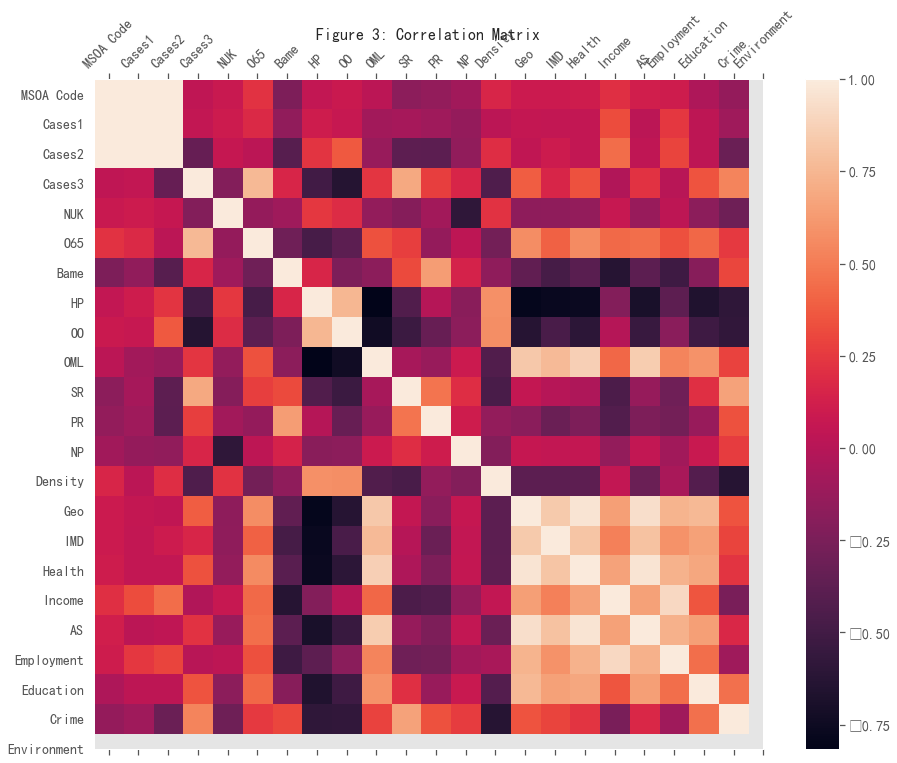

In [23]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(15, 12))
plt.matshow(covid.corr(), fignum=f.number)
plt.xticks(range(covid.shape[1]), covid.columns, fontsize=14, rotation=45)
plt.yticks(range(covid.shape[1]), covid.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Figure 3: Correlation Matrix', fontsize=16)

### 2.2 Lockdown1

### 2.2.1 Linear regression

In [24]:
lockdown1 = covid.drop(columns=['MSOA Code','Cases2','Cases3'], axis=1)

In [25]:
lockdown1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cases1       973 non-null    float64
 1   NUK          983 non-null    float64
 2   O65          983 non-null    float64
 3   Bame         983 non-null    float64
 4   HP           983 non-null    float64
 5   OO           983 non-null    float64
 6   OML          983 non-null    float64
 7   SR           983 non-null    float64
 8   PR           983 non-null    float64
 9   NP           983 non-null    float64
 10  Density      983 non-null    float64
 11  Geo          983 non-null    float64
 12  IMD          983 non-null    float64
 13  Health       983 non-null    float64
 14  Income       983 non-null    float64
 15  AS           983 non-null    float64
 16  Employment   983 non-null    float64
 17  Education    983 non-null    float64
 18  Crime        983 non-null    float64
 19  Environm

In [26]:
lockdown1.dropna(inplace=True)  

In [27]:
lockdown1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 0 to 982
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cases1       972 non-null    float64
 1   NUK          972 non-null    float64
 2   O65          972 non-null    float64
 3   Bame         972 non-null    float64
 4   HP           972 non-null    float64
 5   OO           972 non-null    float64
 6   OML          972 non-null    float64
 7   SR           972 non-null    float64
 8   PR           972 non-null    float64
 9   NP           972 non-null    float64
 10  Density      972 non-null    float64
 11  Geo          972 non-null    float64
 12  IMD          972 non-null    float64
 13  Health       972 non-null    float64
 14  Income       972 non-null    float64
 15  AS           972 non-null    float64
 16  Employment   972 non-null    float64
 17  Education    972 non-null    float64
 18  Crime        972 non-null    float64
 19  Environm

In [28]:
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const').drop(list_var_not_to_remove)
        
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [29]:
# using VIF on the bike_rental dataset
predictors_lockdown1 = lockdown1.drop({'Cases1'}, axis=1)
response_lockdown1 = lockdown1['Cases1']

# this is a list of dummy variables that represent a categorical variable with three or more categories. They should not be removed even if it has a high VIF. 
# list_var_not_to_remove = ['all_bame_prop','population_prop_over65','Income Score (rate)']
list_var_not_to_remove = ['Income']
df_predictors_select_VIF = drop_column_using_vif_(predictors_lockdown1,list_var_not_to_remove, thresh=2.5)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)

Max VIF: 266.163524203759
Dropping: SR
Max VIF: 61.07038953244887
Dropping: IMD
Max VIF: 24.70855421685297
Dropping: Employment
Max VIF: 16.91257148999946
Dropping: AS
Max VIF: 10.84375078447799
Dropping: NUK
Max VIF: 7.618617104539371
Dropping: OO
Max VIF: 5.195441062273266
Dropping: OML
Max VIF: 4.425271806582523
Dropping: Health
Max VIF: 2.976361198476519
Dropping: Education
Max VIF: 2.8696283709104917
Dropping: Environment
Max VIF: 2.190958952303933
The columns remaining after VIF selection are:
Index(['O65', 'Bame', 'HP', 'PR', 'NP', 'Density', 'Geo', 'Income', 'Crime'], dtype='object')


In [30]:
# using VIF on the bike_rental dataset
predictors_lockdown1 = lockdown1.drop({'Cases1','SR','IMD','Employment','AS','NUK','OO','OML'}, axis=1)
response_lockdown1 = lockdown1['Cases1']

# this is a list of dummy variables that represent a categorical variable with three or more categories. They should not be removed even if it has a high VIF. 
# list_var_not_to_remove = ['all_bame_prop','population_prop_over65','Income Score (rate)']
list_var_not_to_remove = ['Income' ]
df_predictors_select_VIF = drop_column_using_vif_(predictors_lockdown1,list_var_not_to_remove, thresh=2.5)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)

Max VIF: 4.425271806582523
Dropping: Health
Max VIF: 2.976361198476519
Dropping: Education
Max VIF: 2.8696283709104917
Dropping: Environment
Max VIF: 2.190958952303933
The columns remaining after VIF selection are:
Index(['O65', 'Bame', 'HP', 'PR', 'NP', 'Density', 'Geo', 'Income', 'Crime'], dtype='object')


In [31]:
model1=predictors_lockdown1
OLS_out1 = sm.OLS(endog=response_lockdown1.values.tolist(), exog=sm.add_constant(model1)).fit()
OLS_out1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     14.59
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           2.42e-28
Time:                        16:56:00   Log-Likelihood:                -6191.6
No. Observations:                 972   AIC:                         1.241e+04
Df Residuals:                     959   BIC:                         1.247e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         308.3312     40.051      7.698      0.000     229.733     386.929
O65           232.3650    127.524      1.822      0.069     -17.893     482.623
Bame          267.9857     33.182      8.076      0.000     202.867     333.104
HP          -8.077e-05   3.12e-05     -2.588      0.010      -0.000   -1.95e-05
PR             -3.2365      0.707     -4.580      0.000      -4.623      -1.850
NP              4.7629      2.451      1.943      0.052      -0.047       9.573
Density         0.0302      0.106      0.285      0.776      -0.178       0.238
Geo            47.7655     13.148      3.633      0.000      21.963      73.568
Health         33.8783     16.053      2.110      0.035       2.376      65.381
Income        -14.3855    185.018     -0.078      0.938    -377.473     348.702
Education      -1.8732      0.907     -2.066      0.039      -3.652      -0.094
Crime         -44.1270     16.314     -2.705      0.007     -76.143     -12.111
Environment     0.9749      0.888      1.098      0.273      -0.768       2.717
==============================================================================
Omnibus:                      255.497   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              775.855
Skew:                           1.293   Prob(JB):                    3.35e-169
Kurtosis:                       6.531   Cond. No.                     2.35e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2.2.2 Residual test analysis

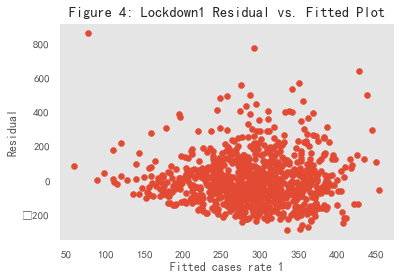

In [32]:
plt.scatter(OLS_out1.fittedvalues, OLS_out1.resid)
# adding title and labels
plt.xlabel('Fitted cases rate 1')
plt.ylabel('Residual')
plt.title('Figure 4: Lockdown1 Residual vs. Fitted Plot')
plt.show()

(array([ 68., 293., 351., 169.,  58.,  20.,   7.,   4.,   0.,   2.]),
 array([-2.08430509, -1.24657084, -0.4088366 ,  0.42889764,  1.26663188,
         2.10436612,  2.94210036,  3.7798346 ,  4.61756884,  5.45530309,
         6.29303733]),
 <a list of 10 Patch objects>)

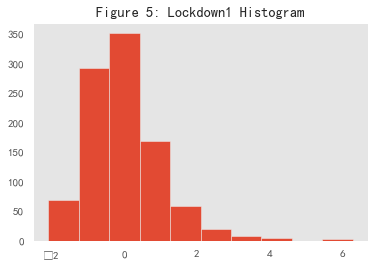

In [33]:
student_resid1 = sm.regression.linear_model.OLSResults.outlier_test(OLS_out1)
plt.title('Figure 5: Lockdown1 Histogram') 
plt.hist(student_resid1.student_resid)

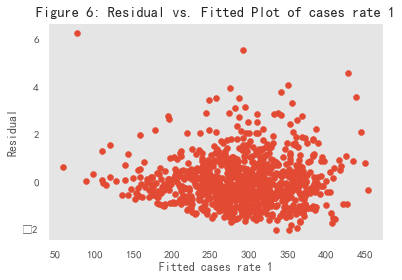

In [34]:
# Exclude those greater than 3
student_resid1 = sm.regression.linear_model.OLSResults.outlier_test(OLS_out1)
plt.scatter(OLS_out1.fittedvalues, student_resid1.student_resid)
plt.xlabel('Fitted cases rate 1')
plt.ylabel('Residual')
plt.title('Figure 6: Residual vs. Fitted Plot of cases rate 1')
plt.show()

Text(0.5, 1.0, 'Figure 8:Q-Q')

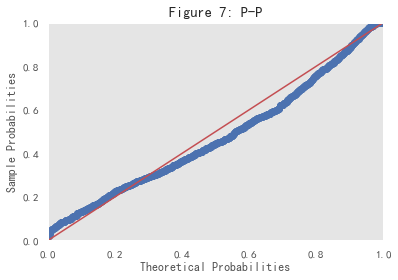

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


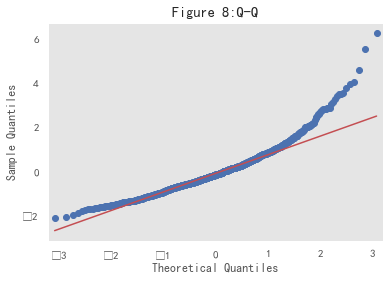

In [35]:
pp_qq_plot = sm.ProbPlot(student_resid1.student_resid)
pp_qq_plot.ppplot(line = '45')
plt.title('Figure 7: P-P')

pp_qq_plot.qqplot(line = 'q')
plt.title('Figure 8:Q-Q')

In [36]:
df_temp1 = sm.regression.linear_model.OLSResults.outlier_test(OLS_out1)
df_temp1 = df_temp1[["student_resid"]]
lockdown1['Residual'] = df_temp1

In [37]:
print(lockdown1.Residual.describe())
lockdown1_final = lockdown1[(lockdown1["Residual"]<3) & (lockdown1["Residual"]>-3)]
print(lockdown1_final.Residual.describe())

count                                   972.0000
mean                                      0.0006
std                                       1.0038
min                                      -2.0843
25%                                      -0.6478
50%                                      -0.1408
75%                                       0.4900
max                                       6.2930
Name: Residual, dtype: float64
count                                   959.0000
mean                                     -0.0535
std                                       0.8890
min                                      -2.0843
25%                                      -0.6591
50%                                      -0.1564
75%                                       0.4524
max                                       2.9075
Name: Residual, dtype: float64


In [38]:
lockdown1_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 0 to 982
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cases1       959 non-null    float64
 1   NUK          959 non-null    float64
 2   O65          959 non-null    float64
 3   Bame         959 non-null    float64
 4   HP           959 non-null    float64
 5   OO           959 non-null    float64
 6   OML          959 non-null    float64
 7   SR           959 non-null    float64
 8   PR           959 non-null    float64
 9   NP           959 non-null    float64
 10  Density      959 non-null    float64
 11  Geo          959 non-null    float64
 12  IMD          959 non-null    float64
 13  Health       959 non-null    float64
 14  Income       959 non-null    float64
 15  AS           959 non-null    float64
 16  Employment   959 non-null    float64
 17  Education    959 non-null    float64
 18  Crime        959 non-null    float64
 19  Environm

In [39]:
predictors_lockdown1_final = lockdown1_final.drop({'Cases1','Residual','SR','IMD','Employment','AS','NUK','OO','OML'}, axis=1)
response_lockdown1_final = lockdown1_final['Cases1']
model1_final=predictors_lockdown1_final
OLS_out1_final = sm.OLS(endog=response_lockdown1_final.values.tolist(), exog=sm.add_constant(model1_final)).fit()
OLS_out1_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     18.04
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           2.27e-35
Time:                        16:56:06   Log-Likelihood:                -5993.0
No. Observations:                 959   AIC:                         1.201e+04
Df Residuals:                     946   BIC:                         1.208e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         297.1742     35.843      8.291      0.000     226.834     367.515
O65           256.1346    113.505      2.257      0.024      33.385     478.885
Bame          254.0734     29.727      8.547      0.000     195.735     312.412
HP          -9.865e-05   2.79e-05     -3.541      0.000      -0.000    -4.4e-05
PR             -3.3659      0.633     -5.317      0.000      -4.608      -2.124
NP              3.7471      2.180      1.719      0.086      -0.530       8.024
Density        -0.0106      0.095     -0.112      0.911      -0.196       0.175
Geo            48.6210     11.726      4.147      0.000      25.609      71.633
Health         25.8371     14.374      1.798      0.073      -2.371      54.045
Income        -68.8467    165.173     -0.417      0.677    -392.994     255.300
Education      -1.5223      0.807     -1.888      0.059      -3.105       0.060
Crime         -34.0174     14.601     -2.330      0.020     -62.671      -5.364
Environment     1.7739      0.792      2.239      0.025       0.219       3.329
==============================================================================
Omnibus:                       71.204   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.452
Skew:                           0.682   Prob(JB):                     1.69e-19
Kurtosis:                       3.549   Cond. No.                     2.35e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2.2.3 Lasso

In [189]:
# increase the max_iter to guarantee convergence
lasso_model1 = linear_model.Lasso(max_iter=10e7, normalize=True)
response_data1 = lockdown1[['Cases1']]
predictors_data1 = lockdown1.drop(columns=['Cases1','Residual'], axis=1)
lasso_model1.fit(X=predictors_data1, y=response_data1)

Lasso(max_iter=100000000.0, normalize=True)

In [190]:
lasso_model1.score(X=predictors_data1, y=response_data1)

0.017266533243048943

In [191]:
# print(lasso_model.coef_)
df_coef_lasso1 = pd.DataFrame({"var":predictors_data1.columns.values, "coef":lasso_model1.coef_})
print(df_coef_lasso1)

            var                                     coef
0           NUK                                   0.0000
1           O65                                   0.0000
2          Bame                                   8.6662
3            HP                                  -0.0000
4            OO                                   0.0000
5           OML                                   0.0000
6            SR                                   0.0000
7            PR                                  -0.0000
8            NP                                  -0.0000
9       Density                                  -0.0000
10          Geo                                   0.0000
11          IMD                                   0.0000
12       Health                                   0.0000
13       Income                                   0.0000
14           AS                                   0.0000
15   Employment                                   0.0000
16    Education                

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 871954.4896280821, tolerance: 10454.843393
  model = cd_fast.enet_coordinate_descent_gram(


(-1.25, 4.25, -84.24101130398145, 97.58997968093678)

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


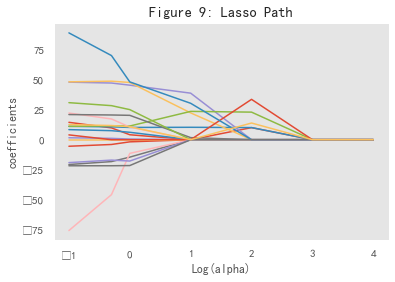

In [192]:
predictors_data_standardised1 = predictors_data1/predictors_data1.std(axis=0)

# alphas_lasso1, coefs_lasso1, _ = lasso_path(predictors_data, response_data, alphas = [.1, .5, 1, 10, 100], fit_intercept=False)
alphas_lasso1, coefs_lasso1, _ = lasso_path(predictors_data_standardised1, response_data1.values.reshape(-1),alphas = [.1, .5, 1, 10, 100, 1000, 10000], fit_intercept=False)
# print(alphas_lasso1.shape)
# print(coefs_lasso1.shape)

log_alphas_lasso1 = np.log10(alphas_lasso1)
for coef_l in coefs_lasso1:
    l1 = plt.plot(log_alphas_lasso1, coef_l)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Figure 9: Lasso Path')
plt.axis('tight')

### 2.2.4 Regression Tree

In [44]:
# We apply train_test_split twice to obtain the three train, dev and test sets
y = lockdown1_final[['Cases1']]
X = lockdown1_final.drop(columns=['Cases1','Residual'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2020)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(671, 19)
(144, 19)
(144, 19)


In [45]:
reg_tree = DecisionTreeRegressor(random_state=0,max_depth=8)
reg_tree.fit(X_train, y_train.values.ravel())
reg_tree.score(X=X_train, y=y_train)

0.5656179072940545

In [46]:
reg_tree.score(X=X_val, y=y_val)

-0.06807847727035332

### 2.2.4.1 Optimise hyperparameters of the ML model

In [47]:
# number of trees to tune
depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# process of tune the number of trees
max_score = 0
best_depth = None
for t in depth:
    m = DecisionTreeRegressor(random_state=0,max_depth=t).fit(X_train,y_train)
    score = m.score(X_val, y_val)
    if score > max_score:
        max_score = score
        best_depth = t

In [48]:
max_score

0.05395178727101402

In [49]:
best_depth

4

In [50]:
rt_final = DecisionTreeRegressor(random_state=0,max_depth=best_depth)
rt_final.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [51]:
print('The score on the training data:')
print(rt_final.score(X_train, y_train))
print('The score on the development data:')
print(rt_final.score(X_val, y_val))

The score on the training data:
0.2347047012232505
The score on the development data:
0.05395178727101402


### 2.2.4.2 Cross-validation

In [66]:
# values of n_estimators
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
rt = DecisionTreeRegressor()

clt = model_selection.GridSearchCV(rt, parameters)
clt.fit(X_train, y_train)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clt.best_params_)
print ("The best score is: ")
print (clt.best_score_)

The best parameter value is: 
{'max_depth': 1}
The best score is: 
0.03945794150820951


In [67]:
max_depth_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

train_scores, valid_scores = validation_curve(estimator=DecisionTreeRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="max_depth",
                                              param_range=max_depth_range,
                                              cv=5)

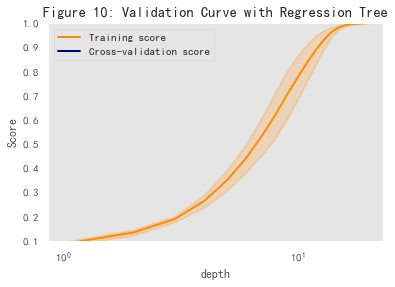

In [68]:
# plotting the validation curve
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Figure 10: Validation Curve with Regression Tree")
plt.xlabel(r"depth")
plt.ylabel("Score")
plt.ylim(0.1, 1.0)
#plt.xlim(1, 20)
lw = 2
plt.semilogx(max_depth_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(max_depth_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(max_depth_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(max_depth_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [69]:
rt_final.score(X_test, y_test)

0.2043221889792166

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.04703
Feature: 2, Score: 0.12319
Feature: 3, Score: 0.05972
Feature: 4, Score: 0.04864
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.07865
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.02313
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.15365
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.35213
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.08772
Feature: 18, Score: 0.02614


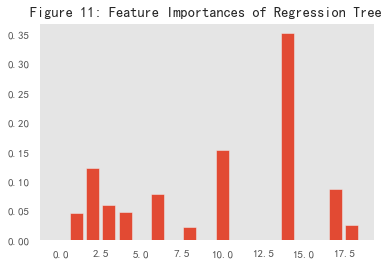

In [70]:
importance = rt_final.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Figure 11: Feature Importances of Regression Tree')
plt.show()

### 2.2.5 Random Forest

In [71]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train.values.ravel())
rf.score(X_train, y_train)

0.8750508046895993

In [72]:
rf.score(X_val, y_val)

0.13715257888657184

### 2.2.5.1 Optimise hyperparameters of the ML model

In [73]:
# number of trees to tune
no_trees = [10,20,30,40,50,70,100,150,200]

# process of tune the number of trees
max_score = 0
best_no_trees = None
for t in no_trees:
    m = RandomForestRegressor(n_estimators=t).fit(X_train,y_train.values.ravel())
    score = m.score(X_val, y_val)
    if score > max_score:
        max_score = score
        best_no_trees = t

In [74]:
max_score

0.1677656649417396

In [75]:
best_no_trees

30

In [76]:
rf_final = RandomForestRegressor(n_estimators=best_no_trees)
rf_final.fit(X_train, y_train.values.ravel())

RandomForestRegressor(n_estimators=30)

In [77]:
print('The score on the training data:')
print(rf_final.score(X_train, y_train))
print('The score on the development data:')
print(rf_final.score(X_val, y_val))

The score on the training data:
0.8640646253808276
The score on the development data:
0.09536234590375481


### 2.2.5.2 Cross-validation

In [78]:
# values of n_estimators
parameters = {'n_estimators':[10,20,30,40,50,70,100,150,200]}
rf = RandomForestRegressor()

clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(X_train, y_train.values.ravel())

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'n_estimators': 200}
The best score is: 
0.0969450437576406


In [79]:
n_estimators_range = [10,20,30,40,50,70,100,150,200]

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train.values.ravel(),
                                              param_name="n_estimators",
                                              param_range=n_estimators_range,
                                              cv=5)

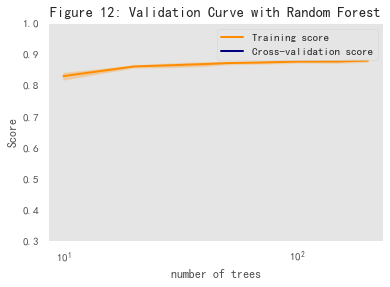

In [80]:
# plotting the validation curve
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Figure 12: Validation Curve with Random Forest")
plt.xlabel(r"number of trees")
plt.ylabel("Score")
plt.ylim(0.3, 1.0)
lw = 2
plt.semilogx(n_estimators_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(n_estimators_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [81]:
rf_final.score(X_test, y_test)

0.28134709062562213

Feature: 0, Score: 0.03898
Feature: 1, Score: 0.07317
Feature: 2, Score: 0.09111
Feature: 3, Score: 0.06287
Feature: 4, Score: 0.04764
Feature: 5, Score: 0.04828
Feature: 6, Score: 0.03439
Feature: 7, Score: 0.05636
Feature: 8, Score: 0.05345
Feature: 9, Score: 0.05507
Feature: 10, Score: 0.06742
Feature: 11, Score: 0.02382
Feature: 12, Score: 0.04174
Feature: 13, Score: 0.01792
Feature: 14, Score: 0.12119
Feature: 15, Score: 0.02519
Feature: 16, Score: 0.04128
Feature: 17, Score: 0.04954
Feature: 18, Score: 0.05057


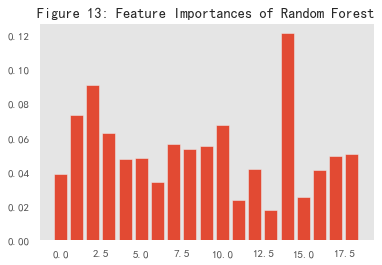

In [82]:
importance = rf_final.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Figure 13: Feature Importances of Random Forest')
plt.show()

### 2.3 Lockdown2

### 2.3.1 Linear regression

In [83]:
lockdown2 = covid.drop(columns=['MSOA Code','Cases1','Cases3'], axis=1)

In [84]:
lockdown2.dropna(inplace=True)  

In [85]:
lockdown2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cases2       983 non-null    float64
 1   NUK          983 non-null    float64
 2   O65          983 non-null    float64
 3   Bame         983 non-null    float64
 4   HP           983 non-null    float64
 5   OO           983 non-null    float64
 6   OML          983 non-null    float64
 7   SR           983 non-null    float64
 8   PR           983 non-null    float64
 9   NP           983 non-null    float64
 10  Density      983 non-null    float64
 11  Geo          983 non-null    float64
 12  IMD          983 non-null    float64
 13  Health       983 non-null    float64
 14  Income       983 non-null    float64
 15  AS           983 non-null    float64
 16  Employment   983 non-null    float64
 17  Education    983 non-null    float64
 18  Crime        983 non-null    float64
 19  Environm

In [86]:
# using VIF on the bike_rental dataset
predictors_lockdown2 = lockdown2.drop({'Cases2'}, axis=1)
response_lockdown2 = lockdown2['Cases2']

# this is a list of dummy variables that represent a categorical variable with three or more categories. They should not be removed even if it has a high VIF. 
list_var_not_to_remove = ['Income']
df_predictors_select_VIF = drop_column_using_vif_(predictors_lockdown2,list_var_not_to_remove, thresh=2.5)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)

Max VIF: 266.1938362730804
Dropping: SR
Max VIF: 61.32049078866528
Dropping: IMD
Max VIF: 24.93899073033301
Dropping: Employment
Max VIF: 17.13978788455599
Dropping: AS
Max VIF: 10.872470876540092
Dropping: NUK
Max VIF: 7.59816490376188
Dropping: OO
Max VIF: 5.202583774734417
Dropping: OML
Max VIF: 4.402340336366497
Dropping: Health
Max VIF: 3.0051315687221205
Dropping: Education
Max VIF: 2.873383627893134
Dropping: Environment
Max VIF: 2.168072947379448
The columns remaining after VIF selection are:
Index(['O65', 'Bame', 'HP', 'PR', 'NP', 'Density', 'Geo', 'Income', 'Crime'], dtype='object')


In [110]:
# using VIF on the bike_rental dataset
predictors_lockdown2 = lockdown2.drop({'Cases2','Residual','SR','IMD','Employment','AS','NUK','OO','OML'}, axis=1)
response_lockdown2 = lockdown2['Cases2']

# this is a list of dummy variables that represent a categorical variable with three or more categories. They should not be removed even if it has a high VIF. 
list_var_not_to_remove = ['Income']
df_predictors_select_VIF = drop_column_using_vif_(predictors_lockdown2,list_var_not_to_remove, thresh=2.5)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)

Max VIF: 4.402340336366497
Dropping: Health
Max VIF: 3.0051315687221205
Dropping: Education
Max VIF: 2.873383627893134
Dropping: Environment
Max VIF: 2.168072947379448
The columns remaining after VIF selection are:
Index(['O65', 'Bame', 'HP', 'PR', 'NP', 'Density', 'Geo', 'Income', 'Crime'], dtype='object')


In [111]:
model2=predictors_lockdown2
OLS_out2 = sm.OLS(endog=response_lockdown2.values.tolist(), exog=sm.add_constant(model2)).fit()
OLS_out2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     15.74
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           9.56e-31
Time:                        19:28:19   Log-Likelihood:                -6993.4
No. Observations:                 983   AIC:                         1.401e+04
Df Residuals:                     970   BIC:                         1.408e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1053.9748     83.616     12.605      0.000     889.886    1218.064
O65           180.2893    267.300      0.674      0.500    -344.264     704.842
Bame          521.1958     69.580      7.491      0.000     384.651     657.741
HP           6.817e-05   6.49e-05      1.050      0.294   -5.92e-05       0.000
PR             -0.5358      1.478     -0.362      0.717      -3.437       2.365
NP             -2.4751      5.097     -0.486      0.627     -12.477       7.527
Density        -0.4259      0.222     -1.921      0.055      -0.861       0.009
Geo           -65.0546     27.432     -2.371      0.018    -118.888     -11.221
Health         61.8779     33.308      1.858      0.064      -3.486     127.242
Income      -3009.0355    388.204     -7.751      0.000   -3770.851   -2247.220
Education      18.2554      1.903      9.593      0.000      14.521      21.990
Crime           5.6115     33.689      0.167      0.868     -60.500      71.723
Environment    -2.2148      1.856     -1.193      0.233      -5.858       1.428
==============================================================================
Omnibus:                      199.269   Durbin-Watson:                   1.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              674.039
Skew:                           0.962   Prob(JB):                    4.31e-147
Kurtosis:                       6.572   Cond. No.                     2.38e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2.3.2 Residual test analysis

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


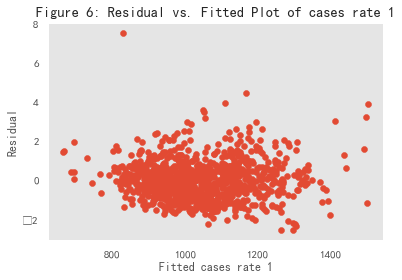

In [93]:
# Exclude those greater than 3
student_resid2 = sm.regression.linear_model.OLSResults.outlier_test(OLS_out2)
plt.scatter(OLS_out2.fittedvalues, student_resid2.student_resid)
plt.xlabel('Fitted cases rate 1')
plt.ylabel('Residual')
plt.title('Figure 6: Residual vs. Fitted Plot of cases rate 1')
plt.show()

In [100]:
df_temp2 = sm.regression.linear_model.OLSResults.outlier_test(OLS_out2)
df_temp2 = df_temp2[["student_resid"]]
lockdown2['Residual'] = df_temp2

In [101]:
print(lockdown2.Residual.describe())
lockdown2_final = lockdown2[(lockdown2["Residual"]<3) & (lockdown2["Residual"]>-3)]
print(lockdown2_final.Residual.describe())

count                                   983.0000
mean                                      0.0006
std                                       1.0039
min                                      -2.5882
25%                                      -0.6322
50%                                      -0.0589
75%                                       0.5322
max                                       7.5387
Name: Residual, dtype: float64
count                                   974.0000
mean                                     -0.0366
std                                       0.9220
min                                      -2.5882
25%                                      -0.6331
50%                                      -0.0750
75%                                       0.5143
max                                       2.9566
Name: Residual, dtype: float64


In [102]:
lockdown2_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 982
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cases2       974 non-null    float64
 1   NUK          974 non-null    float64
 2   O65          974 non-null    float64
 3   Bame         974 non-null    float64
 4   HP           974 non-null    float64
 5   OO           974 non-null    float64
 6   OML          974 non-null    float64
 7   SR           974 non-null    float64
 8   PR           974 non-null    float64
 9   NP           974 non-null    float64
 10  Density      974 non-null    float64
 11  Geo          974 non-null    float64
 12  IMD          974 non-null    float64
 13  Health       974 non-null    float64
 14  Income       974 non-null    float64
 15  AS           974 non-null    float64
 16  Employment   974 non-null    float64
 17  Education    974 non-null    float64
 18  Crime        974 non-null    float64
 19  Environm

In [104]:
predictors_lockdown2_final = lockdown2_final.drop({'Cases2','Residual','SR','IMD','Employment','AS','NUK','OO','OML'}, axis=1)
response_lockdown2_final = lockdown2_final['Cases2']
model2_final=predictors_lockdown2_final
OLS_out2_final = sm.OLS(endog=response_lockdown2_final.values.tolist(), exog=sm.add_constant(model2_final)).fit()
OLS_out2_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     15.65
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           1.50e-30
Time:                        19:24:06   Log-Likelihood:                -6847.2
No. Observations:                 974   AIC:                         1.372e+04
Df Residuals:                     961   BIC:                         1.378e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1050.4358     77.385     13.574      0.000     898.574    1202.298
O65           166.5387    246.626      0.675      0.500    -317.449     650.526
Bame          517.3545     64.656      8.002      0.000     390.471     644.238
HP           2.063e-05      6e-05      0.344      0.731   -9.72e-05       0.000
PR             -1.2581      1.372     -0.917      0.359      -3.950       1.434
NP             -1.8452      4.703     -0.392      0.695     -11.075       7.384
Density        -0.4595      0.204     -2.249      0.025      -0.860      -0.059
Geo           -56.9937     25.387     -2.245      0.025    -106.813      -7.174
Health         36.0244     30.815      1.169      0.243     -24.448      96.497
Income      -2677.6513    361.096     -7.415      0.000   -3386.279   -1969.024
Education      15.4932      1.812      8.549      0.000      11.937      19.049
Crime          13.5358     31.178      0.434      0.664     -47.649      74.721
Environment    -1.4238      1.712     -0.831      0.406      -4.784       1.937
==============================================================================
Omnibus:                       22.823   Durbin-Watson:                   1.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.795
Skew:                           0.373   Prob(JB):                     6.81e-06
Kurtosis:                       3.175   Cond. No.                     2.40e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2.3.3 Lasso

In [183]:
# increase the max_iter to guarantee convergence
lasso_model2 = linear_model.Lasso(max_iter=10e7, normalize=True)
response_data2 = lockdown2[['Cases2']]
predictors_data2 = lockdown2.drop(columns=['Cases2','Residual'], axis=1)
lasso_model2.fit(X=predictors_data2, y=response_data2)

Lasso(max_iter=100000000.0, normalize=True)

In [184]:
lasso_model2.score(X=predictors_data2, y=response_data2)

0.1311153103004562

In [185]:
# print(lasso_model.coef_)
df_coef_lasso2 = pd.DataFrame({"var":predictors_data2.columns.values, "coef":lasso_model2.coef_})
print(df_coef_lasso2)

            var                                     coef
0           NUK                                   0.0000
1           O65                                   0.0000
2          Bame                                  10.9974
3            HP                                  -0.0000
4            OO                                   0.0000
5           OML                                   0.0000
6            SR                                  -1.9216
7            PR                                   0.0000
8            NP                                   0.0000
9       Density                                  -0.0000
10          Geo                                  -0.0000
11          IMD                                  -0.0000
12       Health                                  -0.0000
13       Income                                  -0.0000
14           AS                                 897.4315
15   Employment                                  -0.0000
16    Education                

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186841.2467984259, tolerance: 116204.62927800001
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3550034.125214502, tolerance: 116204.62927800001
  model = cd_fast.enet_coordinate_descent_gram(


(-1.25, 4.25, -229.43835962363767, 301.2758830396789)

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


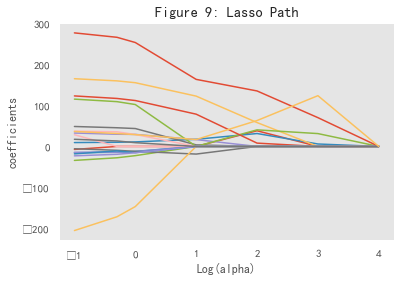

In [186]:
predictors_data_standardised2 = predictors_data2/predictors_data2.std(axis=0)

alphas_lasso2, coefs_lasso2, _ = lasso_path(predictors_data_standardised2, response_data2.values.reshape(-1),alphas = [.1, .5, 1, 10, 100, 1000, 10000], fit_intercept=False)

log_alphas_lasso2 = np.log10(alphas_lasso2)
for coef_2 in coefs_lasso2:
    l2 = plt.plot(log_alphas_lasso2, coef_2)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Figure 9: Lasso Path')
plt.axis('tight')

### 2.3.4 Regression Tree

In [116]:
# We apply train_test_split twice to obtain the three train, dev and test sets
y = lockdown2_final[['Cases2']]
X = lockdown2_final.drop(columns=['Cases2','Residual'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2020)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(681, 19)
(146, 19)
(147, 19)


In [117]:
reg_tree = DecisionTreeRegressor(random_state=0,max_depth=8)
reg_tree.fit(X_train, y_train.values.ravel())
reg_tree.score(X=X_train, y=y_train)

0.6924248284893058

In [118]:
reg_tree.score(X=X_val, y=y_val)

-0.22530042264786942

### 2.3.4.1 Optimise hyperparameters of the ML model

In [119]:
# number of trees to tune
depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# process of tune the number of trees
max_score = 0
best_depth = None
for t in depth:
    m = DecisionTreeRegressor(random_state=0,max_depth=t).fit(X_train,y_train)
    score = m.score(X_val, y_val)
    if score > max_score:
        max_score = score
        best_depth = t

In [120]:
max_score

0.11200735583602672

In [121]:
best_depth

2

In [122]:
rt_final = DecisionTreeRegressor(random_state=0,max_depth=best_depth)
rt_final.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [123]:
print('The score on the training data:')
print(rt_final.score(X_train, y_train))
print('The score on the development data:')
print(rt_final.score(X_val, y_val))

The score on the training data:
0.17240270484172948
The score on the development data:
0.11200735583602672


### 2.3.4.2 Cross-validation

In [124]:
# values of n_estimators
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
rt = DecisionTreeRegressor()

clt = model_selection.GridSearchCV(rt, parameters)

clt.fit(X_train, y_train)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clt.best_params_)
print ("The best score is: ")
print (clt.best_score_)

The best parameter value is: 
{'max_depth': 3}
The best score is: 
0.09461334492643733


In [127]:
max_depth_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

train_scores, valid_scores = validation_curve(estimator=DecisionTreeRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="max_depth",
                                              param_range=max_depth_range,
                                              cv=5)           

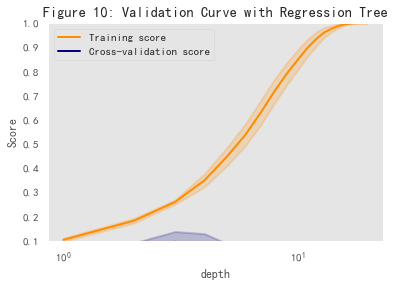

In [128]:
# plotting the validation curve
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Figure 10: Validation Curve with Regression Tree")
plt.xlabel(r"depth")
plt.ylabel("Score")
plt.ylim(0.1, 1.0)
#plt.xlim(1, 20)
lw = 2
plt.semilogx(max_depth_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(max_depth_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(max_depth_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(max_depth_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [129]:
rt_final.score(X_test, y_test)

0.06876858319380308

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.09375
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.32001
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.58624
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000


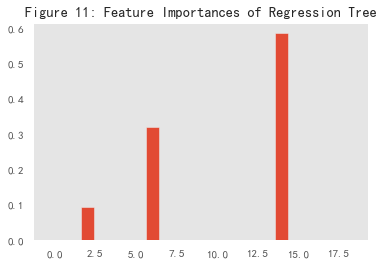

In [130]:
importance = rt_final.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Figure 11: Feature Importances of Regression Tree')
plt.show()

### 2.3.5 Random Forest

In [131]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train.values.ravel())
rf.score(X_train, y_train)

0.8965103312194633

In [132]:
rf.score(X_val, y_val)

0.23777584079877734

### 2.3.5.1 Optimise hyperparameters of the ML model

In [133]:
# number of trees to tune
no_trees = [10,20,30,40,50,70,100,150,200]

# process of tune the number of trees
max_score = 0
best_no_trees = None
for t in no_trees:
    m = RandomForestRegressor(n_estimators=t).fit(X_train,y_train.values.ravel())
    score = m.score(X_val, y_val)
    if score > max_score:
        max_score = score
        best_no_trees = t

In [134]:
max_score

0.2790840479102652

In [135]:
best_no_trees

100

In [136]:
rf_final = RandomForestRegressor(n_estimators=best_no_trees)
rf_final.fit(X_train, y_train.values.ravel())

RandomForestRegressor()

In [137]:
print('The score on the training data:')
print(rf_final.score(X_train, y_train))
print('The score on the development data:')
print(rf_final.score(X_val, y_val))

The score on the training data:
0.8979852937146382
The score on the development data:
0.23005320029384024


### 2.3.5.2 Cross-validation

In [138]:
# values of n_estimators
parameters = {'n_estimators':[10,20,30,40,50,70,100,150,200]}
rf = RandomForestRegressor()

clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(X_train, y_train.values.ravel())

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'n_estimators': 200}
The best score is: 
0.2502907150943912


In [139]:
n_estimators_range = [10,20,30,40,50,70,100,150,200]

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train.values.ravel(),
                                              param_name="n_estimators",
                                              param_range=n_estimators_range,
                                              cv=5)

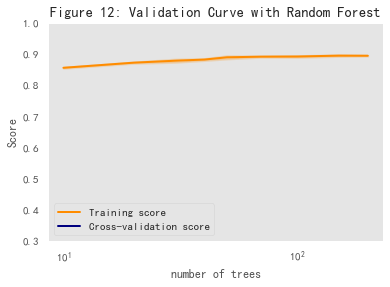

In [140]:
# plotting the validation curve
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Figure 12: Validation Curve with Random Forest")
plt.xlabel(r"number of trees")
plt.ylabel("Score")
plt.ylim(0.3, 1.0)
lw = 2
plt.semilogx(n_estimators_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(n_estimators_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [141]:
rf_final.score(X_test, y_test)

0.23513718522516214

Feature: 0, Score: 0.07648
Feature: 1, Score: 0.05223
Feature: 2, Score: 0.08822
Feature: 3, Score: 0.04240
Feature: 4, Score: 0.04359
Feature: 5, Score: 0.03182
Feature: 6, Score: 0.06900
Feature: 7, Score: 0.03960
Feature: 8, Score: 0.02782
Feature: 9, Score: 0.05650
Feature: 10, Score: 0.04372
Feature: 11, Score: 0.02462
Feature: 12, Score: 0.03393
Feature: 13, Score: 0.02251
Feature: 14, Score: 0.18131
Feature: 15, Score: 0.04566
Feature: 16, Score: 0.04452
Feature: 17, Score: 0.04233
Feature: 18, Score: 0.03374


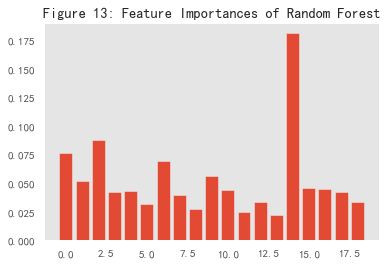

In [142]:
importance = rf_final.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Figure 13: Feature Importances of Random Forest')
plt.show()

## 2.4 Lockdown3

### 2.4.1 Linear regression

In [156]:
lockdown3 = covid.drop(columns=['MSOA Code','Cases1','Cases2'], axis=1)

In [157]:
lockdown3.dropna(inplace=True)  

In [158]:
lockdown3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cases3       983 non-null    float64
 1   NUK          983 non-null    float64
 2   O65          983 non-null    float64
 3   Bame         983 non-null    float64
 4   HP           983 non-null    float64
 5   OO           983 non-null    float64
 6   OML          983 non-null    float64
 7   SR           983 non-null    float64
 8   PR           983 non-null    float64
 9   NP           983 non-null    float64
 10  Density      983 non-null    float64
 11  Geo          983 non-null    float64
 12  IMD          983 non-null    float64
 13  Health       983 non-null    float64
 14  Income       983 non-null    float64
 15  AS           983 non-null    float64
 16  Employment   983 non-null    float64
 17  Education    983 non-null    float64
 18  Crime        983 non-null    float64
 19  Environm

In [162]:
# using VIF on the bike_rental dataset
predictors_lockdown3 = lockdown3.drop({'Cases3','SR','IMD','Employment','AS','NUK','OO','OML'}, axis=1)
response_lockdown3 = lockdown3['Cases3']

# this is a list of dummy variables that represent a categorical variable with three or more categories. They should not be removed even if it has a high VIF. 
# list_var_not_to_remove = ['all_bame_prop','population_prop_over65','Income Score (rate)']
list_var_not_to_remove = ['Income' ]
df_predictors_select_VIF = drop_column_using_vif_(predictors_lockdown3,list_var_not_to_remove, thresh=2.5)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)

Max VIF: 4.402340336366497
Dropping: Health
Max VIF: 3.0051315687221205
Dropping: Education
Max VIF: 2.873383627893134
Dropping: Environment
Max VIF: 2.168072947379448
The columns remaining after VIF selection are:
Index(['O65', 'Bame', 'HP', 'PR', 'NP', 'Density', 'Geo', 'Income', 'Crime'], dtype='object')


In [163]:
model3=predictors_lockdown3
OLS_out3 = sm.OLS(endog=response_lockdown3.values.tolist(), exog=sm.add_constant(model3)).fit()
OLS_out3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     34.74
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           2.87e-67
Time:                        20:39:49   Log-Likelihood:                -7223.4
No. Observations:                 983   AIC:                         1.447e+04
Df Residuals:                     970   BIC:                         1.454e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2495.7053    105.666     23.619      0.000    2288.345    2703.066
O65          -965.6739    337.789     -2.859      0.004   -1628.555    -302.792
Bame          231.0270     87.929      2.627      0.009      58.474     403.580
HP             -0.0003    8.2e-05     -4.071      0.000      -0.000      -0.000
PR             -8.5681      1.868     -4.587      0.000     -12.234      -4.902
NP            -19.3223      6.441     -3.000      0.003     -31.962      -6.682
Density        -0.6110      0.280     -2.181      0.029      -1.161      -0.061
Geo           -53.7722     34.667     -1.551      0.121    -121.802      14.258
Health         52.4227     42.092      1.245      0.213     -30.178     135.024
Income      -3755.2900    490.576     -7.655      0.000   -4718.003   -2792.577
Education      17.0931      2.405      7.108      0.000      12.374      21.812
Crime         152.6950     42.573      3.587      0.000      69.150     236.240
Environment    -4.8179      2.346     -2.054      0.040      -9.421      -0.214
==============================================================================
Omnibus:                       32.585   Durbin-Watson:                   1.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.120
Skew:                           0.461   Prob(JB):                     2.36e-08
Kurtosis:                       3.077   Cond. No.                     2.38e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2.4.2 Residual test analysis

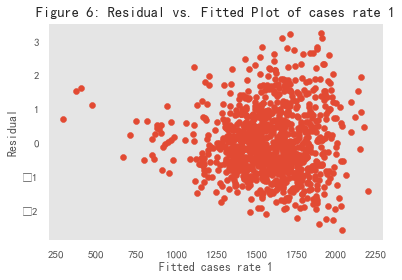

In [164]:
# Exclude those greater than 3
student_resid3 = sm.regression.linear_model.OLSResults.outlier_test(OLS_out3)
plt.scatter(OLS_out3.fittedvalues, student_resid3.student_resid)
plt.xlabel('Fitted cases rate 1')
plt.ylabel('Residual')
#plt.ylim(-5,5)
plt.title('Figure 6: Residual vs. Fitted Plot of cases rate 1')
plt.show()

In [197]:
df_temp3 = sm.regression.linear_model.OLSResults.outlier_test(OLS_out3)
df_temp3 = df_temp3[["student_resid"]]
lockdown3['Residual'] = df_temp3

In [198]:
print(lockdown3.Residual.describe())
lockdown3_final = lockdown3[(lockdown3["Residual"]<3) & (lockdown3["Residual"]>-3)]
print(lockdown3_final.Residual.describe())

count                                   983.0000
mean                                      0.0005
std                                       1.0016
min                                      -2.6118
25%                                      -0.6881
50%                                      -0.1247
75%                                       0.6159
max                                       3.2675
Name: Residual, dtype: float64
count                                   979.0000
mean                                     -0.0125
std                                       0.9828
min                                      -2.6118
25%                                      -0.6904
50%                                      -0.1277
75%                                       0.6078
max                                       2.8538
Name: Residual, dtype: float64


In [199]:
lockdown3_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 982
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cases3       979 non-null    float64
 1   NUK          979 non-null    float64
 2   O65          979 non-null    float64
 3   Bame         979 non-null    float64
 4   HP           979 non-null    float64
 5   OO           979 non-null    float64
 6   OML          979 non-null    float64
 7   SR           979 non-null    float64
 8   PR           979 non-null    float64
 9   NP           979 non-null    float64
 10  Density      979 non-null    float64
 11  Geo          979 non-null    float64
 12  IMD          979 non-null    float64
 13  Health       979 non-null    float64
 14  Income       979 non-null    float64
 15  AS           979 non-null    float64
 16  Employment   979 non-null    float64
 17  Education    979 non-null    float64
 18  Crime        979 non-null    float64
 19  Environm

In [200]:
predictors_lockdown3_final = lockdown3_final.drop({'Cases3','Residual','SR','IMD','Employment','AS','NUK','OO','OML'}, axis=1)
response_lockdown3_final = lockdown3_final['Cases3']
model3_final=predictors_lockdown3_final
OLS_out3_final = sm.OLS(endog=response_lockdown3_final.values.tolist(), exog=sm.add_constant(model3_final)).fit()
OLS_out3_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     34.76
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           2.91e-67
Time:                        20:56:48   Log-Likelihood:                -7175.1
No. Observations:                 979   AIC:                         1.438e+04
Df Residuals:                     966   BIC:                         1.444e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2460.2062    103.824     23.696      0.000    2256.460    2663.952
O65          -934.4918    331.587     -2.818      0.005   -1585.205    -283.779
Bame          189.2974     86.656      2.184      0.029      19.241     359.354
HP             -0.0003   8.05e-05     -4.242      0.000      -0.000      -0.000
PR             -7.6214      1.838     -4.146      0.000     -11.229      -4.014
NP            -19.0532      6.320     -3.015      0.003     -31.457      -6.650
Density        -0.5753      0.275     -2.093      0.037      -1.115      -0.036
Geo           -47.6940     34.082     -1.399      0.162    -114.577      19.189
Health         57.8922     41.337      1.401      0.162     -23.228     139.012
Income      -3573.8497    482.273     -7.410      0.000   -4520.274   -2627.426
Education      17.2098      2.361      7.289      0.000      12.577      21.843
Crime         136.3015     41.858      3.256      0.001      54.157     218.445
Environment    -4.6989      2.302     -2.041      0.042      -9.217      -0.181
==============================================================================
Omnibus:                       25.688   Durbin-Watson:                   1.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.340
Skew:                           0.408   Prob(JB):                     1.16e-06
Kurtosis:                       2.934   Cond. No.                     2.38e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2.4.3 Lasso

In [201]:
# increase the max_iter to guarantee convergence
lasso_model3 = linear_model.Lasso(max_iter=10e7, normalize=True)
response_data3 = lockdown3[['Cases3']]
predictors_data3 = lockdown3.drop(columns=['Cases3','Residual'], axis=1)
lasso_model3.fit(X=predictors_data3, y=response_data3)

Lasso(max_iter=100000000.0, normalize=True)

In [202]:
lasso_model3.score(X=predictors_data3, y=response_data3)

0.3616163679131458

In [203]:
# print(lasso_model.coef_)
df_coef_lasso3 = pd.DataFrame({"var":predictors_data3.columns.values, "coef":lasso_model3.coef_})
print(df_coef_lasso3)

            var                                     coef
0           NUK                                  -5.0536
1           O65                                  -0.0000
2          Bame                                   0.0000
3            HP                                  -0.0000
4            OO                                   0.0000
5           OML                                   2.6639
6            SR                                  -3.9784
7            PR                                  -0.0000
8            NP                                 -15.6170
9       Density                                  -0.0000
10          Geo                                  -0.0000
11          IMD                                  -0.0000
12       Health                                   0.0000
13       Income                                  -0.0000
14           AS                               1,783.1685
15   Employment                                  -0.0000
16    Education                

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5599589.932507217, tolerance: 266342.686226
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1027757.4735352248, tolerance: 266342.686226
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1246218.348173678, tolerance: 266342.686226
  model = cd_fast.enet_coordinate_descent_gram(


(-1.25, 4.25, -460.3655457664395, 444.7619681079674)

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


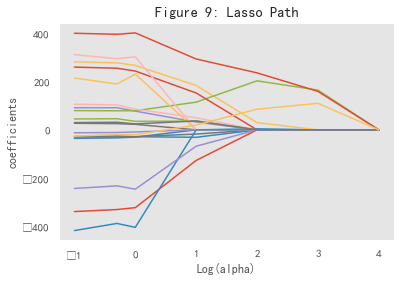

In [204]:
predictors_data_standardised3 = predictors_data3/predictors_data3.std(axis=0)

alphas_lasso3, coefs_lasso3, _ = lasso_path(predictors_data_standardised3, response_data3.values.reshape(-1),alphas = [.1, .5, 1, 10, 100, 1000, 10000], fit_intercept=False)

log_alphas_lasso3 = np.log10(alphas_lasso3)
for coef_3 in coefs_lasso3:
    l3 = plt.plot(log_alphas_lasso3, coef_3)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Figure 9: Lasso Path')
plt.axis('tight')

### 2.4.4 Regression Tree

In [205]:
# We apply train_test_split twice to obtain the three train, dev and test sets
y = lockdown3_final[['Cases3']]
X = lockdown3_final.drop(columns=['Cases3','Residual'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2020)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(685, 19)
(147, 19)
(147, 19)


In [206]:
reg_tree = DecisionTreeRegressor(random_state=0,max_depth=8)
reg_tree.fit(X_train, y_train.values.ravel())
reg_tree.score(X=X_train, y=y_train)

0.7693540737660611

In [207]:
reg_tree.score(X=X_val, y=y_val)

0.17644255144332555

### 2.4.4.1 Optimise hyperparameters of the ML model

In [208]:
# number of trees to tune
depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# process of tune the number of trees
max_score = 0
best_depth = None
for t in depth:
    m = DecisionTreeRegressor(random_state=0,max_depth=t).fit(X_train,y_train)
    score = m.score(X_val, y_val)
    if score > max_score:
        max_score = score
        best_depth = t

In [209]:
max_score

0.2665706612061486

In [210]:
best_depth

4

In [211]:
rt_final = DecisionTreeRegressor(random_state=0,max_depth=best_depth)
rt_final.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [212]:
print('The score on the training data:')
print(rt_final.score(X_train, y_train))
print('The score on the development data:')
print(rt_final.score(X_val, y_val))

The score on the training data:
0.4549494453909473
The score on the development data:
0.2665706612061486


### 2.4.4.2 Cross-validation

In [213]:
# values of n_estimators
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
rt = DecisionTreeRegressor()

clt = model_selection.GridSearchCV(rt, parameters)

clt.fit(X_train, y_train)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clt.best_params_)
print ("The best score is: ")
print (clt.best_score_)

The best parameter value is: 
{'max_depth': 3}
The best score is: 
0.26548787243316563


In [214]:
max_depth_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

train_scores, valid_scores = validation_curve(estimator=DecisionTreeRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="max_depth",
                                              param_range=max_depth_range,
                                              cv=5)

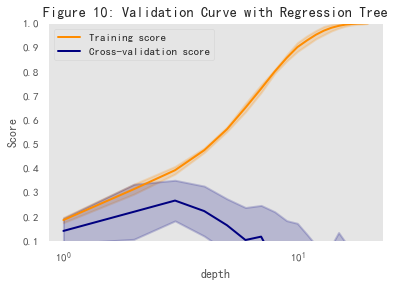

In [215]:
# plotting the validation curve
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Figure 10: Validation Curve with Regression Tree")
plt.xlabel(r"depth")
plt.ylabel("Score")
plt.ylim(0.1, 1.0)
#plt.xlim(1, 20)
lw = 2
plt.semilogx(max_depth_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(max_depth_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(max_depth_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(max_depth_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [216]:
rt_final.score(X_test, y_test)

0.32507064410075603

Feature: 0, Score: 0.02502
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.02492
Feature: 3, Score: 0.09374
Feature: 4, Score: 0.17770
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.04754
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01763
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.06480
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.52513
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.02352


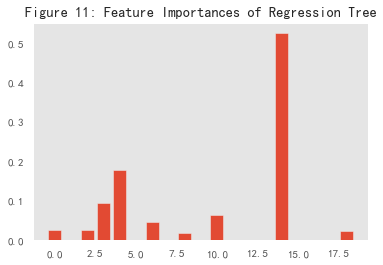

In [217]:
importance = rt_final.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Figure 11: Feature Importances of Regression Tree')
plt.show()

### 2.4.5 Random Forest

In [218]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train.values.ravel())
rf.score(X_train, y_train)

0.9187300174602898

In [219]:
rf.score(X_val, y_val)

0.44583574529866665

### 2.4.5.1 Optimise hyperparameters of the ML model

In [220]:
# number of trees to tune
no_trees = [10,20,30,40,50,70,100,150,200]

# process of tune the number of trees
max_score = 0
best_no_trees = None
for t in no_trees:
    m = RandomForestRegressor(n_estimators=t).fit(X_train,y_train.values.ravel())
    score = m.score(X_val, y_val)
    if score > max_score:
        max_score = score
        best_no_trees = t

In [221]:
max_score

0.4535204487434583

In [222]:
best_no_trees

200

In [223]:
rf_final = RandomForestRegressor(n_estimators=best_no_trees)
rf_final.fit(X_train, y_train.values.ravel())

RandomForestRegressor(n_estimators=200)

In [224]:
print('The score on the training data:')
print(rf_final.score(X_train, y_train))
print('The score on the development data:')
print(rf_final.score(X_val, y_val))

The score on the training data:
0.9215547810476541
The score on the development data:
0.43264525934351616


### 2.4.5.2 Cross-validation

In [225]:
# values of n_estimators
parameters = {'n_estimators':[10,20,30,40,50,70,100,150,200]}
rf = RandomForestRegressor()

clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(X_train, y_train.values.ravel())

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'n_estimators': 150}
The best score is: 
0.41684676718995056


In [226]:
n_estimators_range = [10,20,30,40,50,70,100,150,200]

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train.values.ravel(),
                                              param_name="n_estimators",
                                              param_range=n_estimators_range,
                                              cv=5)

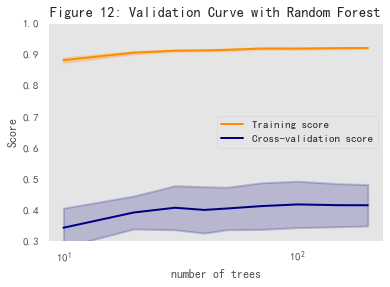

In [227]:
# plotting the validation curve
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Figure 12: Validation Curve with Random Forest")
plt.xlabel(r"number of trees")
plt.ylabel("Score")
plt.ylim(0.3, 1.0)
lw = 2
plt.semilogx(n_estimators_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(n_estimators_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [228]:
rf_final.score(X_test, y_test)

0.44775143327903977

Feature: 0, Score: 0.10355
Feature: 1, Score: 0.03583
Feature: 2, Score: 0.04255
Feature: 3, Score: 0.05680
Feature: 4, Score: 0.07669
Feature: 5, Score: 0.04699
Feature: 6, Score: 0.03537
Feature: 7, Score: 0.04936
Feature: 8, Score: 0.03791
Feature: 9, Score: 0.04068
Feature: 10, Score: 0.04618
Feature: 11, Score: 0.01920
Feature: 12, Score: 0.02541
Feature: 13, Score: 0.01935
Feature: 14, Score: 0.24486
Feature: 15, Score: 0.02359
Feature: 16, Score: 0.02500
Feature: 17, Score: 0.04170
Feature: 18, Score: 0.02895


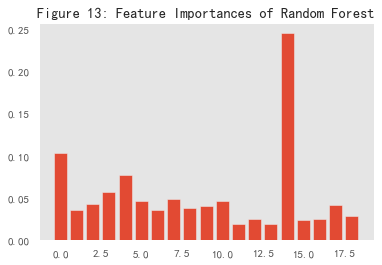

In [230]:
importance = rf_final.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Figure 13: Feature Importances of Random Forest')
plt.show()